In [1]:
!pip install matplotlib

In [2]:
import pandas as pd

In [3]:
# Loading JSON data into DataFrames
users_df = pd.read_json('users.json', lines=True)
receipts_df = pd.read_json('receipts.json', lines=True)
brands_df = pd.read_json('brands.json', lines=True)

In [4]:
# Missing Values
users_missing = users_df.isna().sum()
receipts_missing = receipts_df.isna().sum()
brands_missing = brands_df.isna().sum()

In [5]:
print("Missing Values in Users table")
print(users_missing)

Missing Values in Users table
_id              0
active           0
createdDate      0
lastLogin       62
role             0
signUpSource    48
state           56
dtype: int64


In [6]:
print("Missing Values in Receipts table")
print(receipts_missing)

Missing Values in Receipts table
_id                          0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64


In [7]:
print("Missing Values in Brands table")
print(brands_missing)

Missing Values in Brands table
_id               0
barcode           0
category        155
categoryCode    650
cpg               0
name              0
topBrand        612
brandCode       234
dtype: int64


In [8]:
# Duplicate Rows

user_duplicates = users_df[users_df.duplicated(subset='_id', keep=False)]
print("Duplicate UserID:")
print(user_duplicates)

receipts_duplicates = receipts_df[receipts_df.duplicated(subset='_id', keep=False)]
print("Duplicate ReceiptID:")
print(receipts_duplicates)

brands_duplicates = brands_df[brands_df.duplicated(subset='_id', keep=False)]
print("Duplicate BrandID:")
print(brands_duplicates)

#There are 353 duplicate userIDs found.
#There are no duplicate ReceiptID or BrandID found.

Duplicate UserID:
                                      _id  active               createdDate  \
0    {'$oid': '5ff1e194b6a9d73a3a9f1052'}    True  {'$date': 1609687444800}   
1    {'$oid': '5ff1e194b6a9d73a3a9f1052'}    True  {'$date': 1609687444800}   
2    {'$oid': '5ff1e194b6a9d73a3a9f1052'}    True  {'$date': 1609687444800}   
3    {'$oid': '5ff1e1eacfcf6c399c274ae6'}    True  {'$date': 1609687530554}   
4    {'$oid': '5ff1e194b6a9d73a3a9f1052'}    True  {'$date': 1609687444800}   
..                                    ...     ...                       ...   
490  {'$oid': '54943462e4b07e684157a532'}    True  {'$date': 1418998882381}   
491  {'$oid': '54943462e4b07e684157a532'}    True  {'$date': 1418998882381}   
492  {'$oid': '54943462e4b07e684157a532'}    True  {'$date': 1418998882381}   
493  {'$oid': '54943462e4b07e684157a532'}    True  {'$date': 1418998882381}   
494  {'$oid': '54943462e4b07e684157a532'}    True  {'$date': 1418998882381}   

                    lastLogin    

In [9]:
# Outliers (for numeric columns)
# Example: Check 'totalSpent' column in receipts_df
mean = receipts_df['totalSpent'].mean()
std_dev = receipts_df['totalSpent'].std()
outliers = receipts_df[(receipts_df['totalSpent'] > mean + 3 * std_dev) | (receipts_df['totalSpent'] < mean - 3 * std_dev)]

outliers.head()


#We found 5 outliers in the totalSpent column.

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
314,{'$oid': '60025cb80a720f05f300008d'},750.0,"Receipt number 1 completed, bonus point schedu...",{'$date': 1610767544000},{'$date': 1610767544000},{'$date': 1610767915000},{'$date': 1610767925000},{'$date': 1610767915000},1658.3,{'$date': 1610668800000},335.0,[{'description': 'EMIL' S SAUSAGE MUSHROOM PIZ...,FINISHED,1177.84,60025c65fb296c4ef805d9e6
419,{'$oid': '600996ac0a720f05fa000134'},750.0,"Receipt number 1 completed, bonus point schedu...",{'$date': 1611241132000},{'$date': 1611241132000},{'$date': 1611241885000},{'$date': 1611242168000},{'$date': 1611241885000},6257.3,{'$date': 1610841600000},348.0,"[{'barcode': '012000809941', 'brandCode': 'PEP...",FINISHED,1198.68,6009969150b33111fd61f6d9
423,{'$oid': '600a1a8d0a7214ada2000008'},750.0,"Receipt number 1 completed, bonus point schedu...",{'$date': 1611274892000},{'$date': 1611274892000},{'$date': 1611275413000},{'$date': 1611275464000},{'$date': 1611275413000},1178.7,{'$date': 1611187200000},214.0,"[{'barcode': '041000022623', 'brandCode': 'KNO...",FINISHED,1183.10,600a1a457d983a124e9adb9b
446,{'$oid': '600f24970a720f053500002f'},NaN,NaN,{'$date': 1611605143000},{'$date': 1611605143000},NaN,{'$date': 1611606325000},NaN,NaN,{'$date': 1611532800000},599.0,"[{'brandCode': 'BETTY CROCKER', 'description':...",FLAGGED,4368.80,600f20c15edb787dce060911
447,{'$oid': '600f0cc70a720f053500002c'},NaN,NaN,{'$date': 1611599047000},{'$date': 1611599047000},NaN,{'$date': 1611599887000},NaN,NaN,{'$date': 1611532800000},303.0,"[{'brandCode': 'BETTY CROCKER', 'description':...",FLAGGED,2084.82,600f00d05edb787dce05fb84


In [10]:
# Invalid Values 
# Checking negative values in totalSpent column of Receipts table.
invalid_spent = receipts_df[receipts_df['totalSpent'] < 0]

print("\nInvalid TotalSpent Values:")
print(invalid_spent)


#There are no negative values found.


Invalid TotalSpent Values:
Empty DataFrame
Columns: [_id, bonusPointsEarned, bonusPointsEarnedReason, createDate, dateScanned, finishedDate, modifyDate, pointsAwardedDate, pointsEarned, purchaseDate, purchasedItemCount, rewardsReceiptItemList, rewardsReceiptStatus, totalSpent, userId]
Index: []


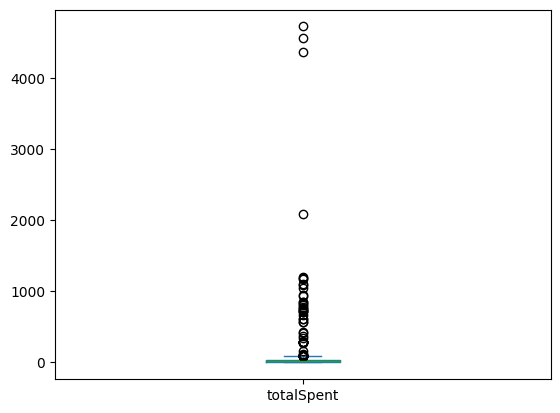

In [11]:
# Visualization
# Example: Create histograms or box plots to visualize numerical columns
import matplotlib.pyplot as plt
receipts_df['totalSpent'].plot(kind='box')
plt.show()

# We can visualize the Outliers in the totalSpent column of Receipts table using the Box Plot.